# 02. Polynomial Regreesion to Multi-linear Regression

---

    When data does not have linear relationship between the independent variables x and response variable y (or the outcome), we have to look for more complicated models. The following graph shows an example of polynomial relation between x and y.  

<img src='./images/poly.png' style='width:500px;height:400px' />


    Actually, we can convert polynomial relation into multi-linear relation. Thus, we are still working on linear regression. 


Suppose we use the following polymonial equation to match the data:

$$ y = b + w_{1}*x + w_{2}x^{2} + .... + w_{d}x^{d} $$

Where d is the degree of the polynomial.

What we can do: transformation:  
$$   x  -> x_{1} $$  
$$   x^{2}  -> x_{2} $$  
$$ .......... $$  
$$   x^{d}  -> x_{d} $$  

Now the problem becomes:
$$ y = b + w_{1}*x_{1} + w_{2}x_{2} + .... + w_{d}x_{d} $$
  
  
This is again another multi-linear regression problem.

### 0. import some modules

In [1]:
# Import python modules 
import math
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


### 1. load data into memory and visualize the data

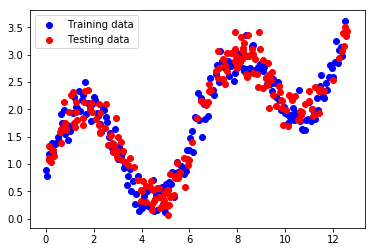

In [2]:
# deRead in train and test synthetic data from local storage
train_x = np.loadtxt('./datasets/data_train.txt', delimiter = ',', dtype=float)
train_y = np.loadtxt('./datasets/label_train.txt', delimiter = ',', dtype=float)

test_x =  np.loadtxt('./datasets/data_test.txt', delimiter = ',', dtype=float)
test_y =  np.loadtxt('./datasets/label_test.txt', delimiter = ',', dtype=float)

# (1) get data and labels
train_x = train_x.reshape(-1,1) # data changed to column vector
test_x = test_x.reshape(-1,1) # data changed to column vector

# show the data in plotting
plt.scatter(train_x, train_y, color='blue', label = "Training data")
plt.scatter(test_x, test_y,  color='red', label = "Testing data")
plt.legend()
plt.show()

###  2. Data transformation

In [3]:
# transform data to higher order
# X from: 1, x, x^2, x^3, ..., x^d
#     to: 1, x1, x2, x3, ...., xd
# here we need to tune this degree d
poly = PolynomialFeatures(degree=5)
poly_x = poly.fit_transform(train_x)
poly_x_test = poly.fit_transform(test_x)

print(poly_x)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 6.28300000e-02 3.94760890e-03 2.48028267e-04
  1.55836160e-05 9.79118595e-07]
 [1.00000000e+00 1.25660000e-01 1.57904356e-02 1.98422614e-03
  2.49337856e-04 3.13317950e-05]
 ...
 [1.00000000e+00 1.23778700e+01 1.53211666e+02 1.89643408e+03
  2.34738145e+04 2.90555825e+05]
 [1.00000000e+00 1.24407100e+01 1.54771265e+02 1.92546443e+03
  2.39541446e+04 2.98006566e+05]
 [1.00000000e+00 1.25035400e+01 1.56338513e+02 1.95478484e+03
  2.44417305e+04 3.05608155e+05]]


### 3. Use linear modeling

In [4]:
# Now we can use the linear model
model = LinearRegression()
model.fit(poly_x,train_y)

#test and compute the erro
y_hat =model.predict(poly_x_test)
MSE = np.mean(np.power(test_y - y_hat, 2))

print("intercept=", model.intercept_, "\nmodel coef = " , model.coef_)
print("MSE=", MSE)



intercept= 0.3377344994803204 
model coef =  [ 0.00000000e+00  3.72432416e+00 -2.35217267e+00  5.24997485e-01
 -4.77344321e-02  1.52269783e-03]
MSE= 0.10068009432475797


### 4. Plotting

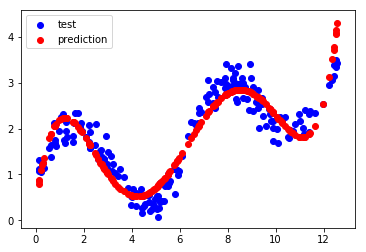

In [5]:
import matplotlib.pyplot as plt

plt.scatter(test_x, test_y, color='blue', label = "test")
plt.scatter(test_x, y_hat,  color='red', label = "prediction")
#plt.savefig('./images/poly.png')

plt.legend()
plt.show()

# END